https://mlrose.readthedocs.io/en/stable/source/neural.html

In [1]:
import numpy as np
import six
import sys

sys.modules['sklearn.externals.six'] = six
import mlrose

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

In [2]:
X, y = load_breast_cancer(return_X_y=True)

In [3]:
# Divide data into train, cross validation, test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train_cross, X_test_cross, y_train_cross, y_test_cross = train_test_split(X_train, y_train, random_state=0)

print("y shape", y.shape)
print("y_test shape", y_test.shape)
print("y_train_cross shape", y_train_cross.shape)
print("y_test_cross shape", y_test_cross.shape)

y shape (569,)
y_test shape (143,)
y_train_cross shape (319,)
y_test_cross shape (107,)


In [4]:
# # Initialize neural network object and fit object
# def model_make(max_iters, max_attempts, algo, hidden_nodes, activation, lr,
#                 restarts=0, schedule=mlrose.GeomDecay(), pop_size=200, mutation_prob=0.1, curve = False):
    
#     nn_model = mlrose.NeuralNetwork(hidden_nodes = hidden_nodes, activation = activation, \
#                                  algorithm = algo, max_iters = max_iters, \
#                                  bias = True, is_classifier = True, learning_rate = lr, \
#                                  early_stopping = True, clip_max=5, max_attempts = max_attempts, \
#                                  random_state = 3, curve=curve)
#     return nn_model
# def model_fit(nn_model, data_X, data_Y):
#     # Train on this fold
#     return nn_model.fit(data_X, data_Y)

# def model_predict(nn_model, data_X, data_Y):
#     y_pred = nn_model.predict(data_X)
#     y_accuracy = accuracy_score(data_Y, y_pred)
    
#     return y_accuracy

# def train_model(nn_model, X_train_cross, y_train_cross):
#     y_train_accuracy = []
#     y_test_accuracy = []
    
#     skf = StratifiedKFold()
#     for train_index, test_index in skf.split(X_train_cross, y_train_cross):
#         X_train_fold, X_test_fold = X_train_cross[train_index], X_train_cross[test_index]
#         y_train_fold, y_test_fold = y_train_cross[train_index], y_train_cross[test_index]
        
#         model_fit(nn_model, X_train_fold, y_train_fold)
        
#         y_train_accuracy.append(model_predict(nn_model, X_train_fold, y_train_fold))
#         y_test_accuracy.append(model_predict(nn_model, X_test_fold, y_test_fold))
    
#     train_accuracy = np.mean(y_train_accuracy)
#     cv_accuracy = np.mean(y_test_accuracy)
#     return train_accuracy, cv_accuracy

### Experiments with Genetic Algorithm in NN

#### Effect of max_iters

In [17]:
import warnings
warnings.filterwarnings("ignore")

In [36]:
algo = 'genetic_alg'
hidden_nodes = [24, 12, 1]
activation = 'relu'
lr = 0.1

train_accuracy = []
cv_accuracy = []
loss = []

r_starts = 0
rLow = 0.1
rHigh = 1.0
rStep = 10

max_attempts = 5
max_iters = 100
for mutation_prob in np.linspace(rLow, rHigh, rStep):
    nn_model = mlrose.NeuralNetwork(hidden_nodes = hidden_nodes, activation = activation, \
                                 algorithm = algo, max_iters = max_iters, \
                                 bias = True, is_classifier = True, learning_rate = lr, \
                                 early_stopping = False, max_attempts = max_attempts, \
                                 random_state = 3, restarts=r_starts, curve=False, mutation_prob=mutation_prob)

    nn_model.fit(X_train_cross, y_train_cross)
    loss.append(nn_model.loss)

x = np.linspace(rLow, rHigh, rStep)
plt.xticks(x)
plt.xlabel('mutation_prob')
plt.plot(x, loss, label="loss")
plt.ylabel('loss')
plt.title('Effect of mutation prob on model loss')
plt.legend()
plt.show()

KeyboardInterrupt: 

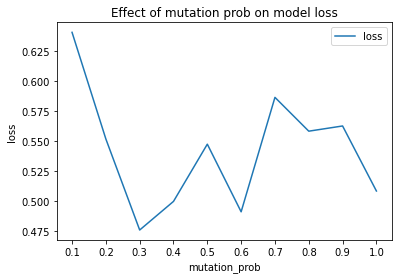

In [20]:
x = np.linspace(rLow, rHigh, rStep)
plt.xticks(x)
plt.xlabel('mutation_prob')
plt.plot(x, loss, label="loss")
plt.ylabel('loss')
plt.title('Effect of mutation prob on model loss')
plt.legend()
plt.show()

#### Effect of population size

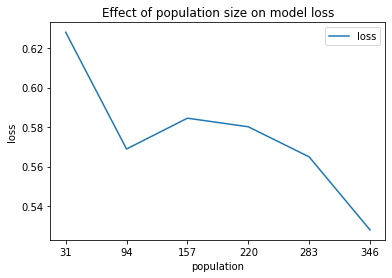

In [31]:
algo = 'genetic_alg'
hidden_nodes = [24, 12, 1]
activation = 'relu'
lr = 0.1

train_accuracy = []
cv_accuracy = []
loss = []

r_starts = 0

train_size = X_train_cross.shape[0]

rLow = int(0.1*train_size)
rHigh = int(1.2* train_size)
rStep = int(0.2*train_size)

max_attempts = 5
max_iters = 100
mutation_prob = 0.3
for population in range(rLow, rHigh, rStep):
    nn_model = mlrose.NeuralNetwork(hidden_nodes = hidden_nodes, activation = activation, \
                                 algorithm = algo, max_iters = max_iters, \
                                 bias = True, is_classifier = True, learning_rate = lr, \
                                 early_stopping = False, max_attempts = max_attempts, \
                                 random_state = 3, restarts=r_starts, curve=False, mutation_prob=mutation_prob,
                                 pop_size = population)

    nn_model.fit(X_train_cross, y_train_cross)
    loss.append(nn_model.loss)

x = range(rLow, rHigh, rStep)
plt.xticks(x)
plt.xlabel('population')
plt.plot(x, loss, label="loss")
plt.ylabel('loss')
plt.title('Effect of population size on model loss')
plt.legend()
plt.show()


In [32]:
train_size

319

### Experiments with  Random Hill Climbingin NN

#### Effect of max_iters

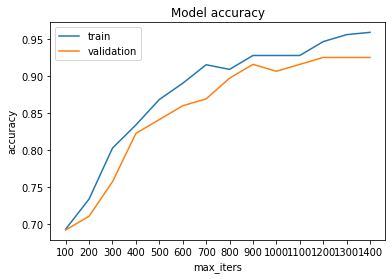

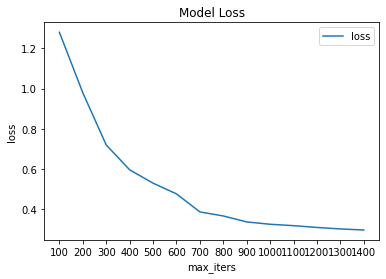

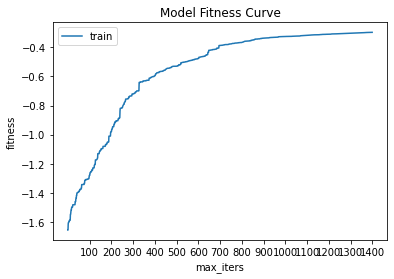

In [9]:
algo = 'random_hill_climb'
hidden_nodes = [24, 12, 1]
activation = 'relu'
lr = 0.1

train_accuracy = []
cv_accuracy = []
loss = []

r_starts = 0
max_iters = 100
max_attempts = 100


max_iters = 2000
rLow = 100
rHigh = 1500
rStep = 100

max_attempts = 100
for max_iters in range(rLow, rHigh, rStep):
    nn_model = mlrose.NeuralNetwork(hidden_nodes = hidden_nodes, activation = activation, \
                                 algorithm = algo, max_iters = max_iters, \
                                 bias = True, is_classifier = True, learning_rate = lr, \
                                 early_stopping = False, max_attempts = max_attempts, \
                                 random_state = 3, restarts=r_starts, curve=True)

    nn_model.fit(X_train_cross, y_train_cross)
    loss.append(nn_model.loss)

    y_pred = nn_model.predict(X_train_cross)
    y_accuracy = accuracy_score(y_train_cross, y_pred)
    train_accuracy.append(y_accuracy)


    y_pred = nn_model.predict(X_test_cross)
    y_accuracy = accuracy_score(y_test_cross, y_pred)
    cv_accuracy.append(y_accuracy)


x = list(range(rLow, rHigh, rStep))
plt.xticks(x)
plt.xlabel('max_iters')
plt.plot(x, train_accuracy, label="train")
plt.plot(x, cv_accuracy, label="validation")
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.legend()
plt.show()

plt.xticks(x)
plt.xlabel('max_iters')
plt.plot(x, loss, label="loss")
plt.ylabel('loss')
plt.title('Model Loss')
plt.legend()
plt.show()


plt.xticks(x)
plt.xlabel('max_iters')
plt.plot(nn_model.fitness_curve, label="train")
plt.ylabel('fitness')
plt.title('Model Fitness Curve')
plt.legend()
plt.show()

#### Effect of random restart on loss

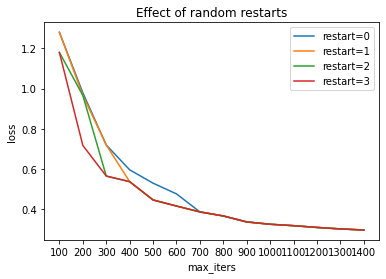

In [10]:
algo = 'random_hill_climb'
hidden_nodes = [24, 12, 1]
activation = 'relu'
lr = 0.1

train_accuracy = []
cv_accuracy = []
loss = []

r_starts = 0
max_iters = 100
max_attempts = 100


max_iters = 2000
rLow = 100
rHigh = 1500
rStep = 100
losses = []

max_attempts = 100

restarts = [0, 1, 2, 3]
for r_starts in restarts:
    losses.append([])
    for max_iters in range(rLow, rHigh, rStep):
        nn_model = mlrose.NeuralNetwork(hidden_nodes = hidden_nodes, activation = activation, \
                                     algorithm = algo, max_iters = max_iters, \
                                     bias = True, is_classifier = True, learning_rate = lr, \
                                     early_stopping = False, max_attempts = max_attempts, \
                                     random_state = 3, restarts=r_starts, curve=True)

        nn_model.fit(X_train_cross, y_train_cross)
        losses[r_starts].append(nn_model.loss)

x = list(range(rLow, rHigh, rStep))
plt.xticks(x)
plt.xlabel('max_iters')
plt.ylabel('loss')
for r_starts in restarts:
    plt.plot(x, losses[r_starts], label="restart="+str(r_starts))
plt.title('Effect of random restarts')    
plt.legend()
plt.show()

### Experiments with Simulated Annealing in NN

#### Effect of max_iters

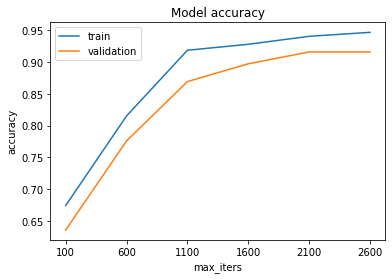

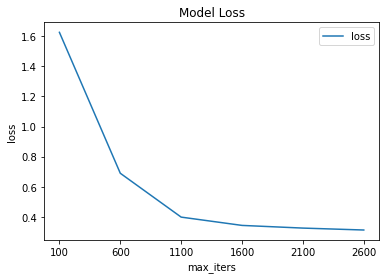

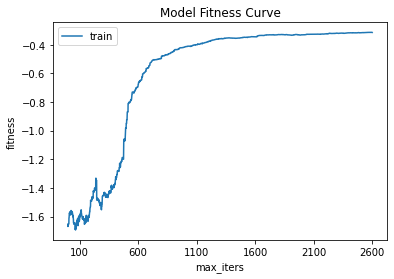

In [11]:
algo = 'simulated_annealing'
hidden_nodes = [24, 12, 1]
activation = 'relu'
lr = 0.1

train_accuracy = []
cv_accuracy = []
loss = []

r_starts = 0
max_iters = 100
max_attempts = 100


max_iters = 2000
rLow = 100
rHigh = 3000
rStep = 500

max_attempts = 100
for max_iters in range(rLow, rHigh, rStep):
    nn_model = mlrose.NeuralNetwork(hidden_nodes = hidden_nodes, activation = activation, \
                                 algorithm = algo, max_iters = max_iters, \
                                 bias = True, is_classifier = True, learning_rate = lr, \
                                 early_stopping = False, max_attempts = max_attempts, \
                                 random_state = 3, restarts=r_starts, curve=True)

    nn_model.fit(X_train_cross, y_train_cross)
    loss.append(nn_model.loss)

    y_pred = nn_model.predict(X_train_cross)
    y_accuracy = accuracy_score(y_train_cross, y_pred)
    train_accuracy.append(y_accuracy)


    y_pred = nn_model.predict(X_test_cross)
    y_accuracy = accuracy_score(y_test_cross, y_pred)
    cv_accuracy.append(y_accuracy)


x = list(range(rLow, rHigh, rStep))

plt.xticks(x)
plt.xlabel('max_iters')
plt.plot(x, train_accuracy, label="train")
plt.plot(x, cv_accuracy, label="validation")
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.legend()
plt.show()

plt.xticks(x)
plt.xlabel('max_iters')
plt.plot(x, loss, label="loss")
plt.ylabel('loss')
plt.title('Model Loss')
plt.legend()
plt.show()

plt.xticks(x)
plt.xlabel('max_iters')
plt.plot(nn_model.fitness_curve, label="train")
plt.ylabel('fitness')
plt.title('Model Fitness Curve')
plt.legend()
plt.show()

#### Effect of schedule on NN loss

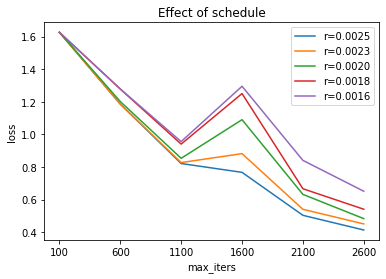

In [12]:
schedule0 = mlrose.ExpDecay(exp_const=0.0025, min_temp=0.0005)
schedule1 = mlrose.ExpDecay(exp_const=0.0023)
schedule2 = mlrose.ExpDecay(exp_const=0.0020)
schedule3 = mlrose.ExpDecay(exp_const=0.0018)
schedule4 = mlrose.ExpDecay(exp_const=0.0016)

sched = [schedule0, schedule1, schedule2, schedule3, schedule4]
sched_names = ["r=0.0025", "r=0.0023", "r=0.0020", "r=0.0018", "r=0.0016"]

algo = 'simulated_annealing'
hidden_nodes = [24, 12, 1]
activation = 'relu'
lr = 0.1

train_accuracy = []
cv_accuracy = []
losses = []

r_starts = 0
max_iters = 100
max_attempts = 100


max_iters = 2000
rLow = 100
rHigh = 3000
rStep = 500

max_attempts = 100
for index, schedule in enumerate(sched):
    losses.append([])
    for max_iters in range(rLow, rHigh, rStep):
        nn_model = mlrose.NeuralNetwork(hidden_nodes = hidden_nodes, activation = activation, \
                                     algorithm = algo, max_iters = max_iters, \
                                     bias = True, is_classifier = True, learning_rate = lr, \
                                     early_stopping = False, max_attempts = max_attempts, \
                                     random_state = 3, restarts=r_starts, curve=True, schedule = schedule)

        nn_model.fit(X_train_cross, y_train_cross)
        losses[index].append(nn_model.loss)

x = list(range(rLow, rHigh, rStep))
plt.xticks(x)
plt.xlabel('max_iters')
plt.ylabel('loss')
plt.title('Effect of schedule')

for index, loss in enumerate(losses):
    plt.plot(x, loss, label=sched_names[index])

plt.legend()
plt.show()

#### Temperature profile

No handles with labels found to put in legend.


5
[0.0025, 0.0023, 0.002, 0.0018, 0.0016]


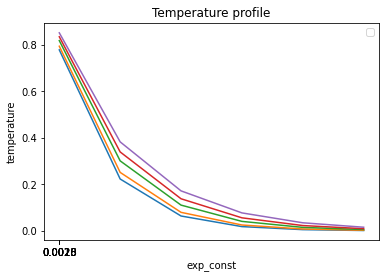

In [27]:
import math

sched = [0.0025, 0.0023, 0.0020, 0.0018, 0.0016]
sched_names = ["r=0.0025", "r=0.0023", "r=0.0020", "r=0.0018", "r=0.0016"]


init_temp = 1.0
min_temp = 0.0005

rLow = 100
rHigh = 3000
rStep = 500
profile = []
for r_index, r in enumerate(sched):
#     print(r_index)
    profile.append([])
    for t in range(rLow, rHigh, rStep):
        y = max(init_temp*math.exp(-1*r*t),min_temp)
        profile[r_index].append(y)


x = sched


print(len(profile))
print(x)

plt.xticks(x)
plt.xlabel('exp_const')
plt.ylabel('temperature')
plt.title('Temperature profile')

for r_index, _ in enumerate(sched):
#     print(r_index)
#     plt.plot(x, profile[r_index], label=sched_names[r_index])
    plt.plot(profile[r_index])

plt.legend()
plt.show()

### Experiments with Gradient Descent

#### Dependence on max_iters

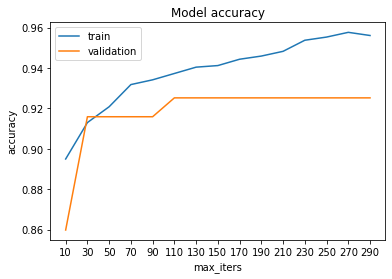

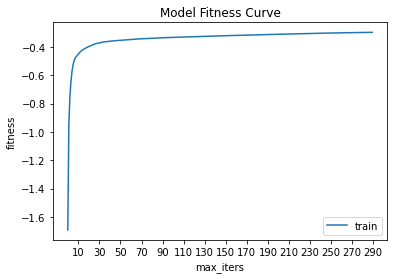

In [39]:
algo = 'gradient_descent'
hidden_nodes = [24, 12, 1]
activation = 'relu'
lr = 0.0001
max_attempts = 10
train_accuracy = []
cv_accuracy = []
rLow = 10
rHigh = 300
rStep = 20

for max_iters in range(rLow, rHigh, rStep):
    nn_model = model_make(max_iters, max_attempts, algo, hidden_nodes, activation, lr, curve=True)    
    model_fit(nn_model, X_train_cross, y_train_cross)
    train_fold_acc, _ = train_model(nn_model, X_train_cross, y_train_cross)
    
    train_accuracy.append(train_fold_acc)
    cv_accuracy.append(model_predict(nn_model, X_test_cross, y_test_cross))


x = list(range(rLow, rHigh, rStep))
plt.xticks(x)
plt.xlabel('max_iters')

plt.ylabel('accuracy')
plt.plot(x, train_accuracy, label="train")
plt.plot(x, cv_accuracy, label="validation")

plt.title('Model accuracy')
plt.legend()
plt.show()

# Plot 
plt.xticks(x)
plt.xlabel('max_iters')

plt.ylabel('fitness')
plt.plot(nn_model.fitness_curve, label="train")

plt.title('Model Fitness Curve')
plt.legend()
plt.show()

### Conclusion

#### RHC

In [33]:
%%time
nn_model = None
algo = 'random_hill_climb'
hidden_nodes = [24, 12, 1]
activation = 'relu'
lr = 0.1

max_attempts = 100
max_iters = 1100
r_starts = 3
nn_model = mlrose.NeuralNetwork(hidden_nodes = hidden_nodes, activation = activation, \
                             algorithm = algo, max_iters = max_iters, \
                             bias = True, is_classifier = True, learning_rate = lr, \
                             early_stopping = True, max_attempts = max_attempts, \
                             random_state = 3, restarts=r_starts, curve=False)

nn_model.fit(X_train_cross, y_train_cross)

y_pred = nn_model.predict(X_train_cross)
y_accuracy = accuracy_score(y_train_cross, y_pred)
print("Train Accuracy", y_accuracy)


y_pred = nn_model.predict(X_test_cross)
y_accuracy = accuracy_score(y_test_cross, y_pred)
print("Validation Accuracy", y_accuracy)

y_pred = nn_model.predict(X_test)
y_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy", y_accuracy)

Train Accuracy 0.9278996865203761
Validation Accuracy 0.9158878504672897
Test Accuracy 0.9440559440559441
CPU times: user 10.9 s, sys: 69 ms, total: 11 s
Wall time: 11 s


### Simulated Annealing

In [34]:
%%time
nn_model = None

algo = 'simulated_annealing'
hidden_nodes = [24, 12, 1]
activation = 'relu'
lr = 0.1

r_starts = 0
max_iters = 2100
max_attempts = 100

schedule0 = mlrose.ExpDecay(exp_const=0.0025, min_temp=0.0005)
nn_model = mlrose.NeuralNetwork(hidden_nodes = hidden_nodes, activation = activation, \
                             algorithm = algo, max_iters = max_iters, \
                             bias = True, is_classifier = True, learning_rate = lr, \
                             early_stopping = False, max_attempts = max_attempts, \
                             random_state = 3, restarts=r_starts, curve=False, schedule=schedule0)

nn_model.fit(X_train_cross, y_train_cross)

y_pred = nn_model.predict(X_train_cross)
y_accuracy = accuracy_score(y_train_cross, y_pred)
print("Train Accuracy", y_accuracy)


y_pred = nn_model.predict(X_test_cross)
y_accuracy = accuracy_score(y_test_cross, y_pred)
print("Validation Accuracy", y_accuracy)

y_pred = nn_model.predict(X_test)
y_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy", y_accuracy)

Train Accuracy 0.8369905956112853
Validation Accuracy 0.8130841121495327
Test Accuracy 0.8601398601398601
CPU times: user 7 s, sys: 39.8 ms, total: 7.03 s
Wall time: 7.06 s


 ### Genetic Algorithm

In [43]:
%%time
nn_model = None

algo = 'genetic_alg'
hidden_nodes = [24, 12, 1]
activation = 'relu'
lr = 0.1

r_starts = 0
max_attempts = 5
max_iters = 100
mutation_prob = 0.3
population = 346
nn_model = mlrose.NeuralNetwork(hidden_nodes = hidden_nodes, activation = activation, \
                             algorithm = algo, max_iters = max_iters, \
                             bias = True, is_classifier = True, learning_rate = lr, \
                             early_stopping = True, max_attempts = max_attempts, \
                             random_state = 3, restarts=r_starts, curve=False, mutation_prob=mutation_prob,
                             pop_size = population)

nn_model.fit(X_train_cross, y_train_cross)

y_pred = nn_model.predict(X_train_cross)
y_accuracy = accuracy_score(y_train_cross, y_pred)
print("Train Accuracy", y_accuracy)


y_pred = nn_model.predict(X_test_cross)
y_accuracy = accuracy_score(y_test_cross, y_pred)
print("Validation Accuracy", y_accuracy)

y_pred = nn_model.predict(X_test)
y_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy", y_accuracy)

Train Accuracy 0.36363636363636365
Validation Accuracy 0.40186915887850466
Test Accuracy 0.3706293706293706
CPU times: user 10.4 s, sys: 33.4 ms, total: 10.4 s
Wall time: 10.4 s


#### Gradient Descent

In [40]:
%%time
nn_model = None

algo = 'gradient_descent'
hidden_nodes = [24, 12, 1]
activation = 'relu'
lr = 0.0001
max_attempts = 10
max_iters = 130
r_starts = 0
nn_model = model_make(max_iters, max_attempts, algo, hidden_nodes, activation, lr, curve=True)    
nn_model = mlrose.NeuralNetwork(hidden_nodes = hidden_nodes, activation = activation, \
                             algorithm = algo, max_iters = max_iters, \
                             bias = True, is_classifier = True, learning_rate = lr, \
                             early_stopping = True, max_attempts = max_attempts, \
                             random_state = 3, restarts=r_starts, curve=False)

nn_model.fit(X_train_cross, y_train_cross)

y_pred = nn_model.predict(X_train_cross)
y_accuracy = accuracy_score(y_train_cross, y_pred)
print("Train Accuracy", y_accuracy)


y_pred = nn_model.predict(X_test_cross)
y_accuracy = accuracy_score(y_test_cross, y_pred)
print("Validation Accuracy", y_accuracy)

y_pred = nn_model.predict(X_test)
y_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy", y_accuracy)

Train Accuracy 0.9404388714733543
Validation Accuracy 0.9252336448598131
Test Accuracy 0.9230769230769231
CPU times: user 592 ms, sys: 4.78 ms, total: 596 ms
Wall time: 597 ms
